In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
import torchvision.transforms as transforms
import torchvision

# Load the CIFAR10 dataset
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True)

# Get the indices of the samples that you're using as a subset
indices = np.random.choice(len(cifar10), size=4000, replace=False)

# Create a subset and define a DataLoader
subset = Subset(cifar10, indices)
dataloader = DataLoader(subset, batch_size=64, shuffle=True)

# You can then iterate over your dataloader
# Each iteration returns a batch of 64 images
for batch_idx, (inputs, targets) in enumerate(dataloader):
    print(f'Batch {batch_idx+1}, {inputs.shape}, {targets.shape}')

transform = transforms.Compose(
    [transforms.ToTensor(),])

batch_size = 4000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

batch_sample = next((iter(trainloader)))

numpy_images = batch_sample[0].numpy()
# np.savez('cifar10_samples.npz', images=numpy_images, labels=numpy_images)
numpy_images.shape

In [8]:
import numpy as np

# Load the CIFAR10 dataset
(train_dataset, test_dataset), dataset_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True)

# Sample 4000 images from the training set
sampled_train_dataset = sample_images(train_dataset, 4000)

# Create an empty list to store the images
images = []

# Iterate over the dataset
for example in sampled_train_dataset.as_numpy_iterator():
    # Get the image from the example and append it to the list
    images.append(example['image'])

# Convert the list of images to a numpy array
images = np.array(images)


# Save the array
np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cirfar10_true_4000.npz', images=images)


2023-06-28 17:51:14.223068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-06-28 17:51:14.223491: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype int64 and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-06-28 17:51:15.842360: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline si

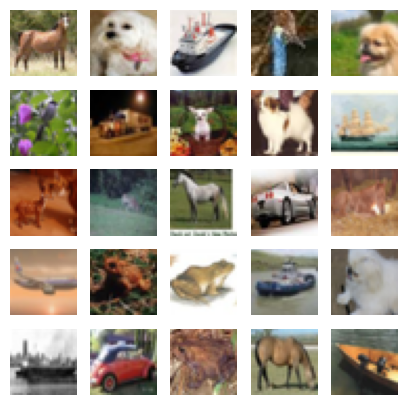

In [9]:


import matplotlib.pyplot as plt

data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cirfar10_true_4000.npz')
images = data['images']


# Number of rows/columns in the grid
grid_size = 5

# Create a new figure
plt.figure(figsize=(5,5))

# Loop over the images
for i in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, i+1)
    # Display the image
    plt.imshow(images[i])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()


In [10]:
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_4000.npz')
    data_samples = data['images']
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                                 'all_samples_600.npz')
    gen_samples = data['x']

In [11]:
data_samples.shape

(4000, 32, 32, 3)